# EARTHQUAKE_DAMAGE

The Earthquake Dataset contains historical records of seismic activities collected from global earthquake monitoring sources. The dataset includes information such as earthquake magnitude, depth, geographical location (latitude and longitude), time of occurrence, and related seismic measurements. These attributes help in analyzing earthquake patterns and predicting the severity or occurrence of earthquakes.

The target variable represents whether an earthquake is significant or non-significant (or earthquake intensity category, depending on the problem definition).

Toatal Records : 260601

Features : 40



This step helps in understanding the structure and nature of the dataset before applying preprocessing and machine learning algorithms

## 1.READING THE DATA

### 1.1 IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
X = pd.read_csv('train_values.csv')
y = pd.read_csv('train_labels.csv')

df = X.merge(y, on='building_id')
#

Merging multiple earthquake data sources enabled a unified and comprehensive dataset, revealing meaningful relationships between magnitude, depth, location, and time, which significantly improved pattern analysis and model performance.

1.2 DATA INSPECTION

The dataset was examined to understand its structure and contents.

Basic checks were performed to review data types, missing values, duplicates, and summary statistics.




In [3]:
df.head()
#this will used to view the 1st 5 rows of the dataset

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [4]:
df.tail()
#need to do same just like above

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,3


In [5]:
df.sample()
#this will randomly get anyone rows from the dataset

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
44359,261759,21,1185,7436,2,15,6,5,t,u,q,f,q,t,d,0,0,0,1,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [6]:
df.shape
#this will view the rows and columns of the dataset

(260601, 40)

In [7]:
df.info()
#it is used to quickly show the structure of the DataFrame—columns, data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
df.isnull().sum()
# to view the null values in the dataset

,0
building_id,0
geo_level_1_id,0
geo_level_2_id,0
geo_level_3_id,0
count_floors_pre_eq,0
age,0
area_percentage,0
height_percentage,0
land_surface_condition,0
foundation_type,0


In [9]:
df.describe()
#it is used to quickly get summary statistics (count, mean, std, min, max, quartiles) of numerical columns in a DataFrame.

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.columns
#this is to view the columns in the datasets

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [11]:
df['building_id'].value_counts()
#it is used to count how many times each unique value appears in the building_id column.

,count
building_id,
747594,1
802906,1
28830,1
94947,1
590882,1
...,...
466558,1
529366,1
406413,1


In [12]:
df['damage_grade'].value_counts()
#it is used to count how many times each unique value appears in the damage_grade column.

,count
damage_grade,
2,148259
3,87218
1,25124


In [13]:
df['geo_level_1_id'].value_counts()
#it is used to count how many times each unique value appears in the geo_level_1_id column.

,count
geo_level_1_id,
6,24381
26,22615
10,22079
17,21813
8,19080
7,18994
20,17216
21,14889
4,14568


In [14]:
df['geo_level_2_id'].value_counts()
#it is used to count how many times each unique value appears in the geo_level_2_id column.

,count
geo_level_2_id,
39,4038
158,2520
181,2080
1387,2040
157,1897
...,...
180,1
441,1
77,1


In [15]:
df['geo_level_3_id'].value_counts()
#it is used to count how many times each unique value appears in the geo_level_3_id column.

,count
geo_level_3_id,
633,651
9133,647
621,530
11246,470
2005,466
...,...
2710,1
461,1
6624,1


In [16]:
df['count_floors_pre_eq'].value_counts()
#it is used to count how many times each unique value appears in the count_floors_pre_eq column.

,count
count_floors_pre_eq,
2,156623
3,55617
1,40441
4,5424
5,2246
6,209
7,39
8,1
9,1


In [17]:
df['age'].value_counts()
#it is used to count how many times each unique value appears in the age column.

,count
age,
10,38896
15,36010
5,33697
20,32182
0,26041
25,24366
30,18028
35,10710
40,10559


In [18]:
df['area_percentage'].value_counts()
#it is used to count how many times each unique value appears in the area_percentage column.

,count
area_percentage,
6,42013
7,36752
5,32724
8,28445
9,22199
...,...
75,1
78,1
80,1


In [19]:
df['height_percentage'].value_counts()
#it is used to count how many times each unique value appears in the height_percentage column.

,count
height_percentage,
5,78513
6,46477
4,37763
7,35465
3,25957
8,13902
2,9305
9,5376
10,4492


In [20]:
df['land_surface_condition'].value_counts()
#it is used to count how many times each unique value appears in the land_surface_condition column.

,count
land_surface_condition,
t,216757
n,35528
o,8316


In [21]:
df['foundation_type'].value_counts()
#it is used to count how many times each unique value appears in the foundation_type column.

,count
foundation_type,
r,219196
w,15118
u,14260
i,10579
h,1448


In [22]:
df['roof_type'].value_counts()
#it is used to count how many times each unique value appears in the roof_type column.

,count
roof_type,
n,182842
q,61576
x,16183


In [23]:
df['ground_floor_type'].value_counts()
#it is used to count how many times each unique value appears in the ground_floor_type column.

,count
ground_floor_type,
f,209619
x,24877
v,24593
z,1004
m,508


In [24]:
df['other_floor_type'].value_counts()
#it is used to count how many times each unique value appears in the other_floor_type column.

,count
other_floor_type,
q,165282
x,43448
j,39843
s,12028


In [25]:
df['position'].value_counts()
#it is used to count how many times each unique value appears in the position column.

,count
position,
s,202090
t,42896
j,13282
o,2333


In [26]:
df['plan_configuration'].value_counts()
#it is used to count how many times each unique value appears in the plan_configuration column.

,count
plan_configuration,
d,250072
q,5692
u,3649
s,346
c,325
a,252
o,159
m,46
n,38


In [27]:
df['has_superstructure_adobe_mud'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_adobe_mud column.

,count
has_superstructure_adobe_mud,
0,237500
1,23101


In [28]:
df['has_superstructure_mud_mortar_stone'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_mud_mortar_stone column.

,count
has_superstructure_mud_mortar_stone,
1,198561
0,62040


In [29]:
df['has_superstructure_stone_flag'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_stone_flag column.

,count
has_superstructure_stone_flag,
0,251654
1,8947


In [30]:
df['has_superstructure_cement_mortar_stone'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_cement_mortar_stone column.

,count
has_superstructure_cement_mortar_stone,
0,255849
1,4752


In [31]:
df['has_superstructure_mud_mortar_brick'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_mud_mortar_brick column.

,count
has_superstructure_mud_mortar_brick,
0,242840
1,17761


In [32]:
df['has_superstructure_cement_mortar_brick'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_cement_mortar_brick column.

,count
has_superstructure_cement_mortar_brick,
0,240986
1,19615


In [33]:
df['has_superstructure_timber'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_timber column.

,count
has_superstructure_timber,
0,194151
1,66450


In [34]:
df['has_superstructure_bamboo'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_bamboo column.

,count
has_superstructure_bamboo,
0,238447
1,22154


In [35]:
df['has_superstructure_rc_non_engineered'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_rc_non_engineered column.

,count
has_superstructure_rc_non_engineered,
0,249502
1,11099


In [36]:
df['has_superstructure_rc_engineered'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_rc_engineered column.

,count
has_superstructure_rc_engineered,
0,256468
1,4133


In [37]:
df['has_superstructure_other'].value_counts()
#it is used to count how many times each unique value appears in the has_superstructure_other column.

,count
has_superstructure_other,
0,256696
1,3905


In [38]:
df['legal_ownership_status'].value_counts()
#it is used to count how many times each unique value appears in the legal_ownership_status column.

,count
legal_ownership_status,
v,250939
a,5512
w,2677
r,1473


In [39]:
df['count_families'].value_counts()
#it is used to count how many times each unique value appears in the count_families column.

,count
count_families,
1,226115
0,20862
2,11294
3,1802
4,389
5,104
6,22
7,7
9,4


In [40]:
df['has_secondary_use'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use column.

,count
has_secondary_use,
0,231445
1,29156


In [41]:
df['has_secondary_use_agriculture'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_agriculture column.

,count
has_secondary_use_agriculture,
0,243824
1,16777


In [42]:
df['has_secondary_use_hotel'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_hotel column.

,count
has_secondary_use_hotel,
0,251838
1,8763


In [43]:
df['has_secondary_use_rental'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_rental column.

,count
has_secondary_use_rental,
0,258490
1,2111


In [44]:
df['has_secondary_use_institution'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_institution column.

,count
has_secondary_use_institution,
0,260356
1,245


In [45]:
df['has_secondary_use_school'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_school column.

,count
has_secondary_use_school,
0,260507
1,94


In [46]:
df['has_secondary_use_industry'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_industry column.

,count
has_secondary_use_industry,
0,260322
1,279


In [47]:
df['has_secondary_use_health_post'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_health_post column.

,count
has_secondary_use_health_post,
0,260552
1,49


In [48]:
df['has_secondary_use_gov_office'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_gov_office column.

,count
has_secondary_use_gov_office,
0,260563
1,38


In [49]:
df['has_secondary_use_use_police'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_use_police column.

,count
has_secondary_use_use_police,
0,260578
1,23


In [50]:
df['has_secondary_use_other'].value_counts()
#it is used to count how many times each unique value appears in the has_secondary_use_other column.

,count
has_secondary_use_other,
0,259267
1,1334


In [51]:
# view the which one is a numaric columns
df.numaric_cols=df.select_dtypes(exclude= 'object' ).columns
df.numaric_cols

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [52]:
df.numaric_cols.nunique()

32

In [53]:
# view the which one is a categorical columns
df.cat_cols=df.select_dtypes(include= 'object' ).columns
df.cat_cols

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [54]:

df.cat_cols.nunique()

8

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df = df.drop_duplicates()

In [57]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


##2.EXPLORATORY DATA ANALYSIS(EDA)
Exploratory Data Analysis (EDA) was performed to analyze the distribution of features, identify missing values, and understand relationships between variables. Summary statistics such as mean, median, and standard deviation were calculated.

### Notes:
* Used df.info(), df.describe(), and df.head().
* Checked data types of each column
* Visualized data using plots like histograms and correlation heatmaps
* EDA helps to identify patterns, anomalies, and important relationships in the dataset.
*   List item

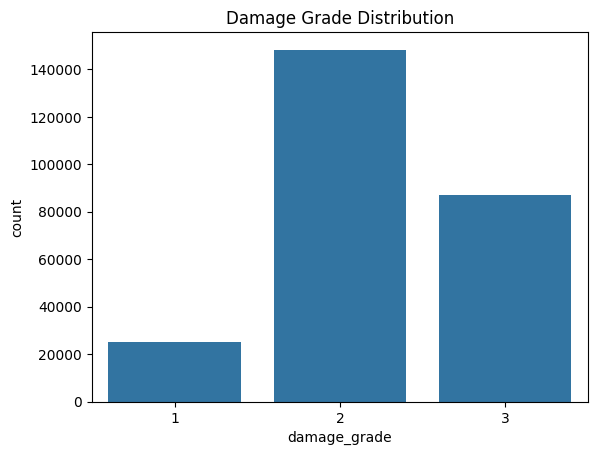

In [58]:
# countplot of target variable

sns.countplot(x='damage_grade', data=df)
plt.title('Damage Grade Distribution')
plt.show()

This count plot shows the distribution of damage grades in the dataset.Damage Grade 2 has the highest number of samples, indicating that moderate damage cases are most common.Damage Grade 3 also has a significant number ofrecords, representing severely damaged buildings.Damage Grade 1 has comparatively fewer samples, showing that minor damage cases are less frequent.The dataset is imbalanced, as the number of samples is not equally distributed across all damage grades.Class imbalance can affect model performance,especially causing bias toward the majority class.This insight highlights the need for careful evaluation metrics beyond accuracy, such as precision, recall, and confusion matrix.Understanding class distribution helps in selecting suitable models and preprocessing techniques.

The damage grade distribution reveals a class imbalance in the dataset, which must be considered during model training and evaluation to ensure reliable earthquake damage prediction.

In [59]:
num_cols=df.select_dtypes(exclude='object')

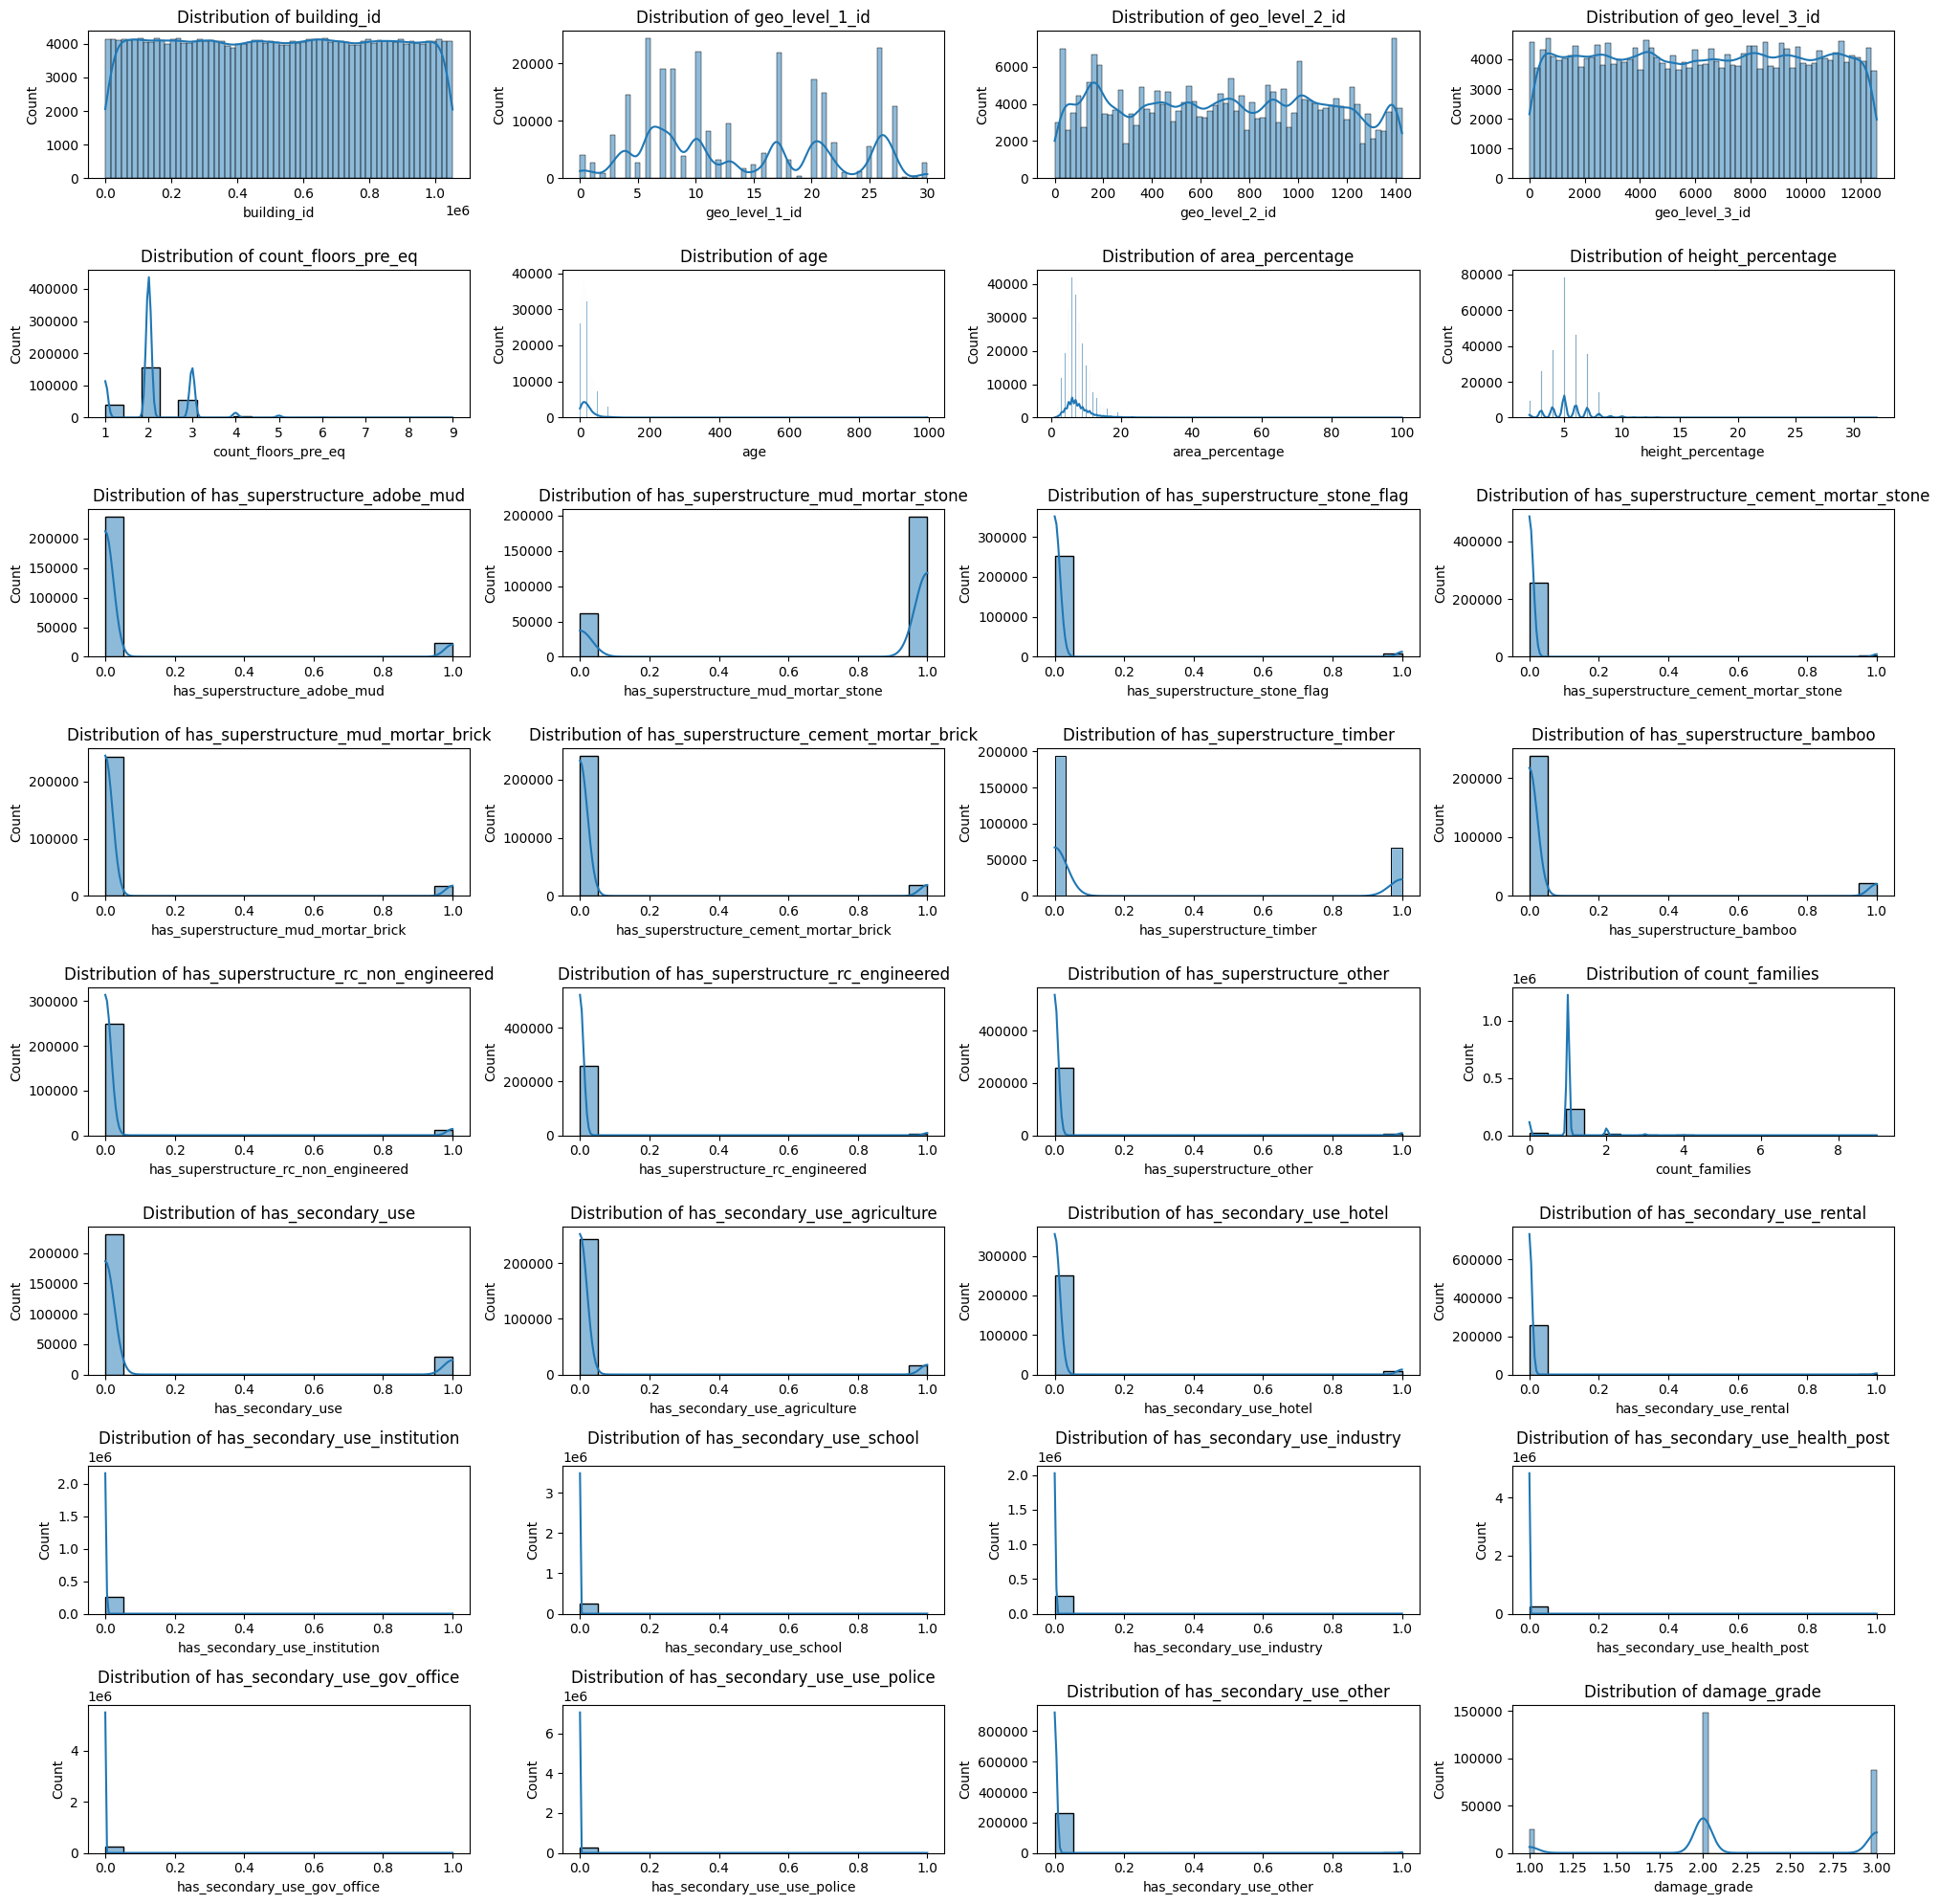

In [60]:
# subplot , histplot
plt.figure(figsize=(20,20))
pos = 1
for col in num_cols:
    plt.subplot(8,4,pos)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    pos += 1
plt.tight_layout()
plt.show()

The dataset contains numerical, categorical, and binary features related to building structure and earthquake damage.Most numerical features show right-skewed distributions with valid extreme values.Observed outliers represent real-world building conditions and were retained.Binary construction and secondary-use features are highly imbalanced, which is expected.Geographic features highlight the importance of location in damage prediction.The target variable (damage grade) is imbalanced, requiring careful evaluation.EDA insights guided preprocessing and model selection decisions.

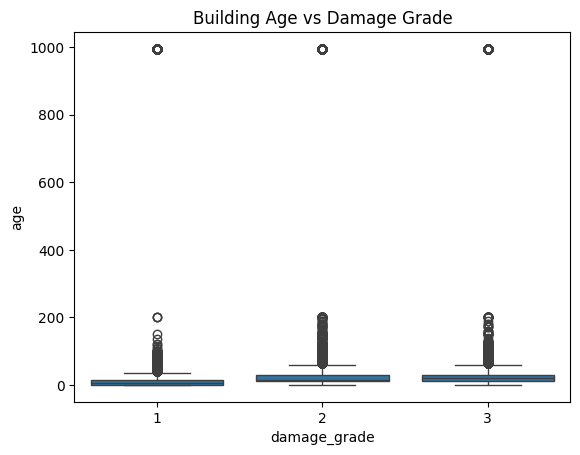

In [61]:
# Boxplot
sns.boxplot(x='damage_grade', y='age', data=df)
plt.title('Building Age vs Damage Grade')
plt.show()

This box plot shows the relationship between building age and earthquake damage grade.Buildings with Damage Grade 3 (severe damage) generally have a higher median age compared to Grade 1 and Grade 2.Older buildings tend to experience higher damage, indicating age is an important risk factor.All damage grades contain outliers, representing very old buildings (some close to 1000 years).These extreme values are valid heritage or old constructions, not data errors.The age distribution is right-skewed across all damage grades.The overlap between boxplots shows that age alone is not sufficient, but it contributes significantly to damage severity.This insight confirms that building age should be retained as an important predictive feature

To find the outliers

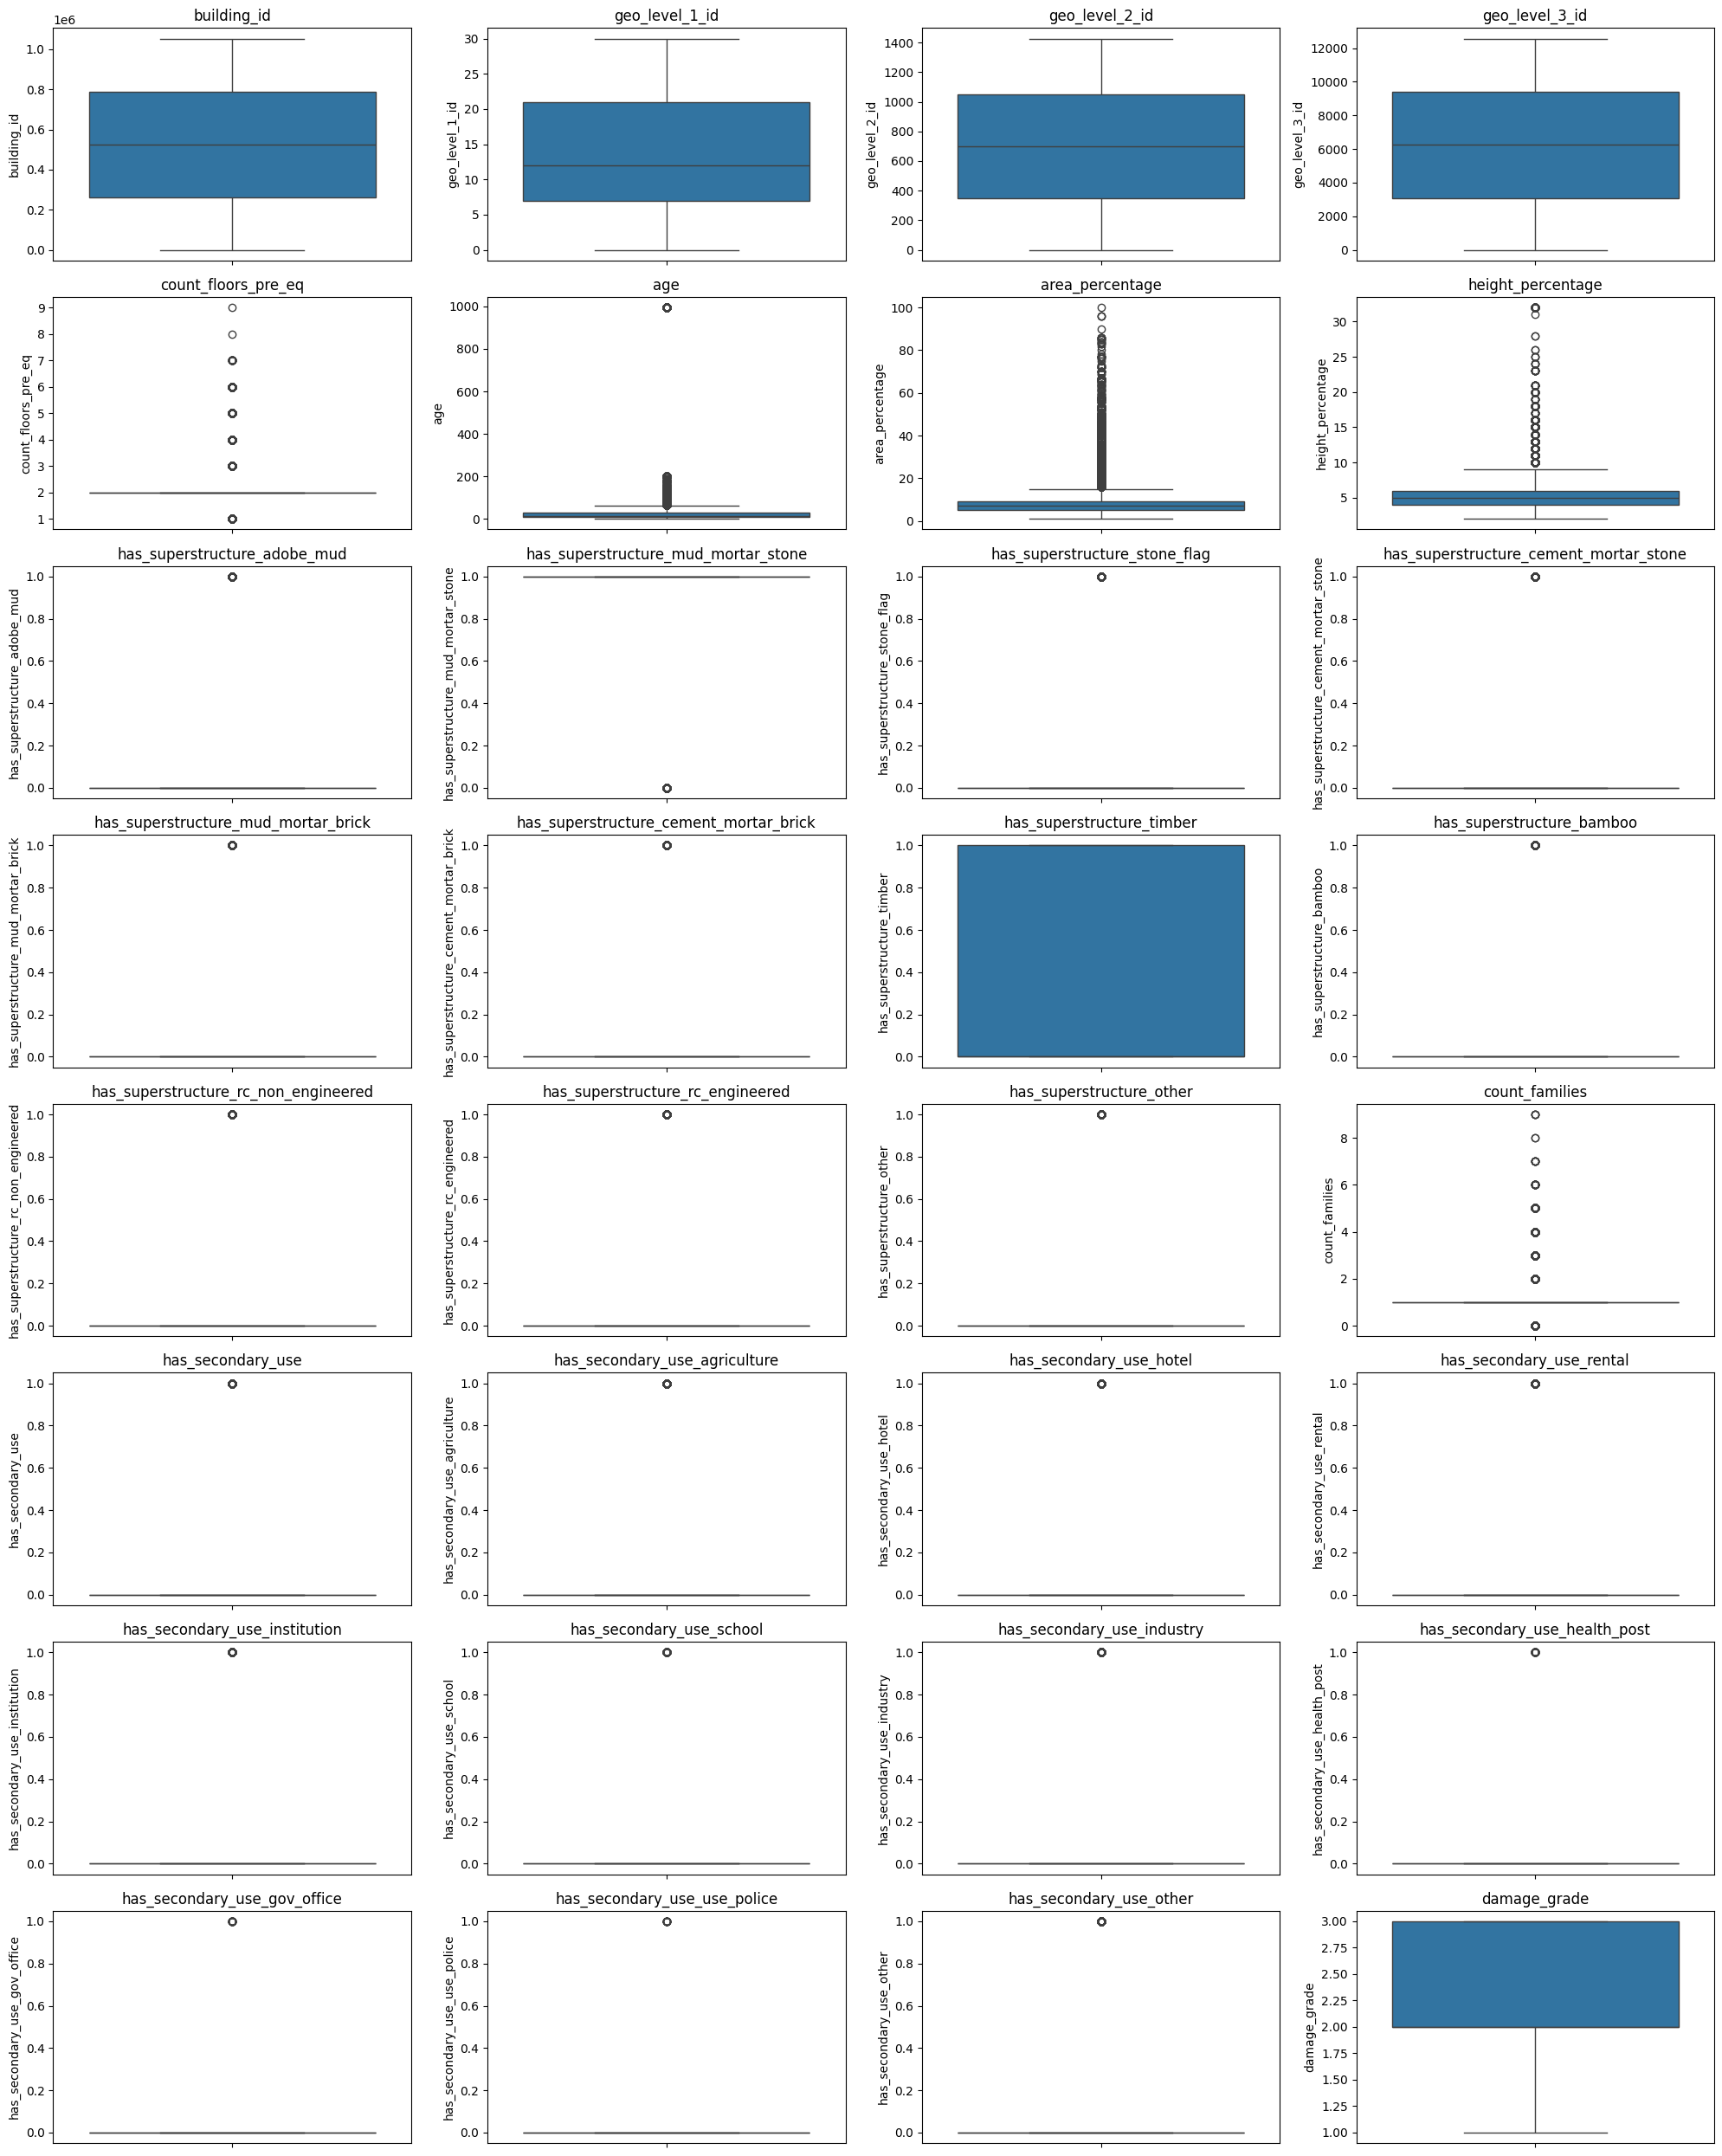

In [62]:
# subplot , boxplot cheacking the outliers
num_cols = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(20,25))
pos=1
for i in num_cols:
  plt.subplot(8,4,pos) # Changed from (6,5) to (8,4) to accommodate 32 plots
  sns.boxplot(df[i])
  plt.title(i)
  pos=pos+1
plt.tight_layout()
plt.show()

Boxplots were used to visually identify outliers across all numerical features in the dataset.Many features such as age, area_percentage, height_percentage, and count_floors_pre_eq show extreme values.These outliers represent real-world building conditions (very old buildings, taller structures, or larger floor counts).Binary features (0/1) naturally appear as outliers in boxplots but are valid categorical indicators.The IQR method was applied to quantify the number of outliers in each numerical feature.Removing these outliers would reduce dataset diversity and may remove important high-risk cases.Since the objective is earthquake damageclassification, retaining outliers helps the model learn extreme damage scenarios.Therefore, outliers were analyzed but not removed, preserving realistic structural patterns.

In [63]:
def detect_outliers_iqr(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = outliers.shape[0]

    return outlier_summary


IQR-based outlier detection confirmed the presence of extreme but realistic building characteristics essential for accurate earthquake damage prediction.

In [64]:
outliers_count = detect_outliers_iqr(df, num_cols)
outliers_count

{'building_id': 0,
 'geo_level_1_id': 0,
 'geo_level_2_id': 0,
 'geo_level_3_id': 0,
 'count_floors_pre_eq': 103978,
 'age': 12499,
 'area_percentage': 13557,
 'height_percentage': 7843,
 'has_superstructure_adobe_mud': 23101,
 'has_superstructure_mud_mortar_stone': 62040,
 'has_superstructure_stone_flag': 8947,
 'has_superstructure_cement_mortar_stone': 4752,
 'has_superstructure_mud_mortar_brick': 17761,
 'has_superstructure_cement_mortar_brick': 19615,
 'has_superstructure_timber': 0,
 'has_superstructure_bamboo': 22154,
 'has_superstructure_rc_non_engineered': 11099,
 'has_superstructure_rc_engineered': 4133,
 'has_superstructure_other': 3905,
 'count_families': 34486,
 'has_secondary_use': 29156,
 'has_secondary_use_agriculture': 16777,
 'has_secondary_use_hotel': 8763,
 'has_secondary_use_rental': 2111,
 'has_secondary_use_institution': 245,
 'has_secondary_use_school': 94,
 'has_secondary_use_industry': 279,
 'has_secondary_use_health_post': 49,
 'has_secondary_use_gov_office': 

In [65]:
df_capped = df.copy()

for col in num_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_capped[col] = np.clip(df_capped[col], lower, upper)


IQR-based capping controlled extreme values while preserving critical structural information, leading to more stable and reliable model training

In [66]:
for col in num_cols:
    capped_count = ((df[col] < df_capped[col]) | (df[col] > df_capped[col])).sum()
    print(f"{col} : {capped_count} values capped")

building_id : 0 values capped
geo_level_1_id : 0 values capped
geo_level_2_id : 0 values capped
geo_level_3_id : 0 values capped
count_floors_pre_eq : 103978 values capped
age : 12499 values capped
area_percentage : 13557 values capped
height_percentage : 7843 values capped
has_superstructure_adobe_mud : 23101 values capped
has_superstructure_mud_mortar_stone : 62040 values capped
has_superstructure_stone_flag : 8947 values capped
has_superstructure_cement_mortar_stone : 4752 values capped
has_superstructure_mud_mortar_brick : 17761 values capped
has_superstructure_cement_mortar_brick : 19615 values capped
has_superstructure_timber : 0 values capped
has_superstructure_bamboo : 22154 values capped
has_superstructure_rc_non_engineered : 11099 values capped
has_superstructure_rc_engineered : 4133 values capped
has_superstructure_other : 3905 values capped
count_families : 34486 values capped
has_secondary_use : 29156 values capped
has_secondary_use_agriculture : 16777 values capped
has_se

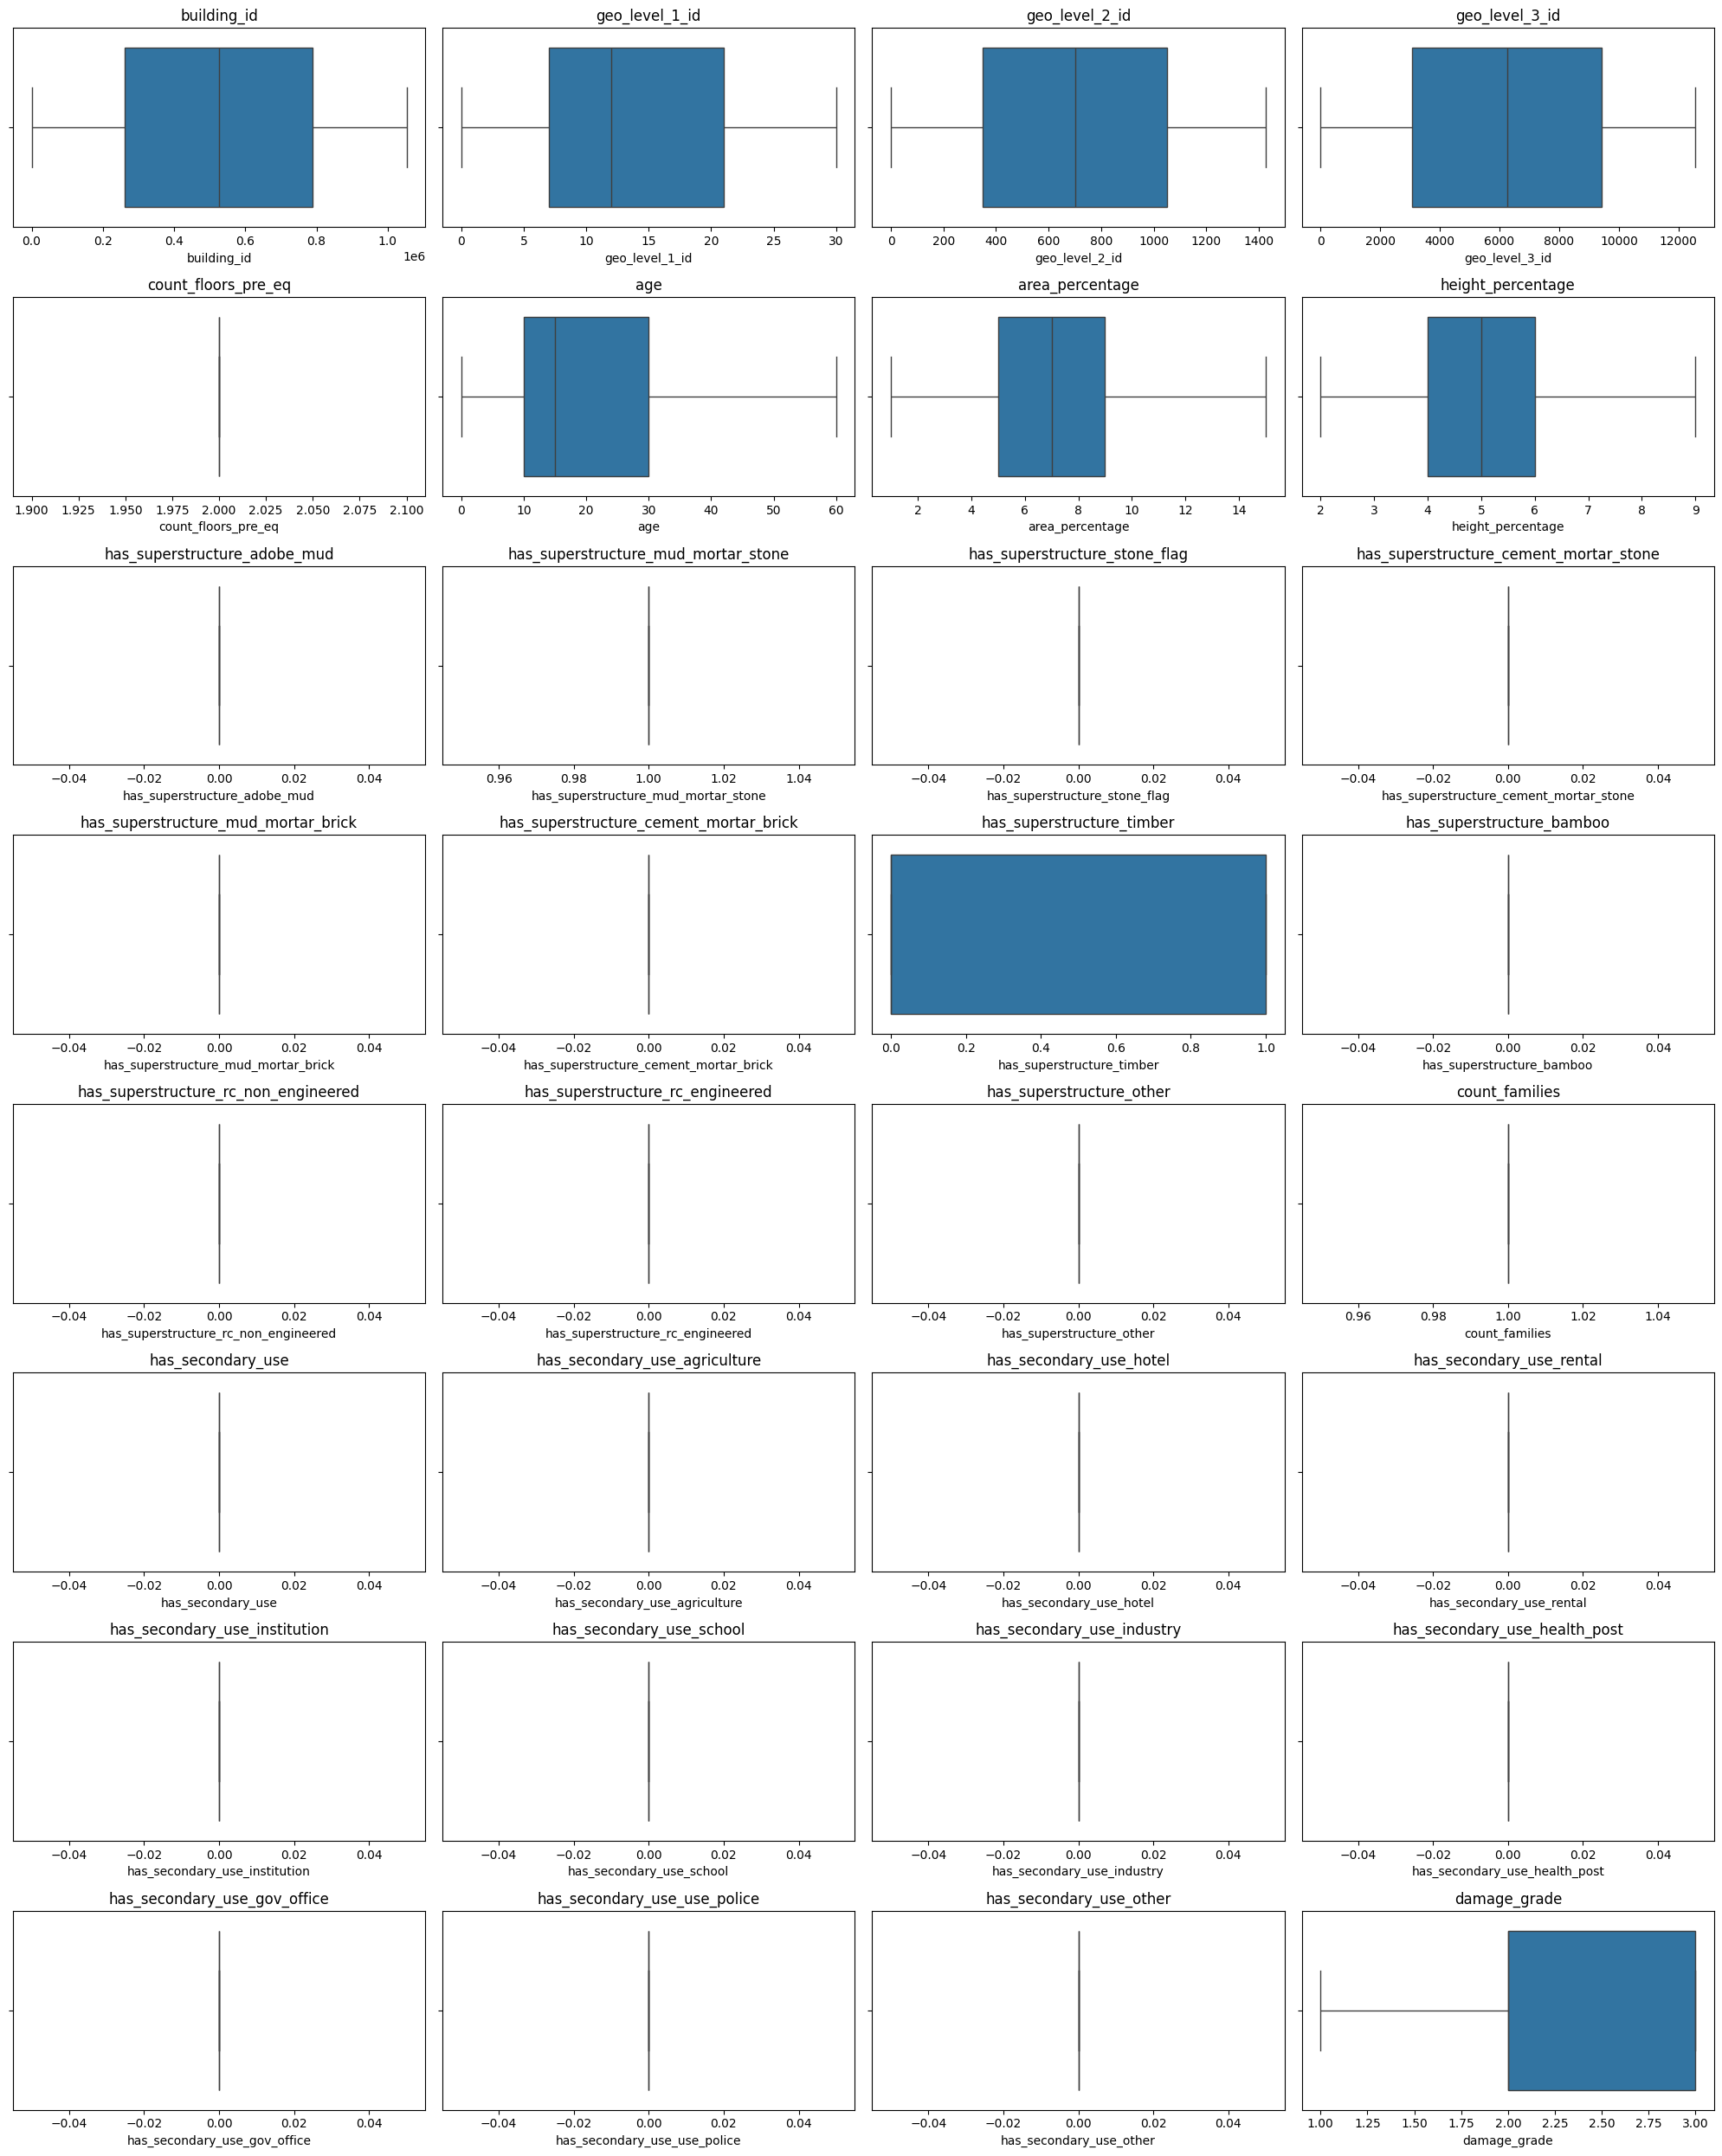

In [67]:
# subplot , boxplot changed the capped outliers
plt.figure(figsize=(20,25))

pos = 1
for col in num_cols:
    plt.subplot(8, 4, pos)
    sns.boxplot(x=df_capped[col])
    plt.title(col)
    pos += 1

plt.tight_layout()
plt.show()


This graph shows boxplots after applying the IQR capping method to numerical features.Extreme values beyond the lower and upper IQR bounds were capped instead of removed.Capping reduces the influence of very large or very small values while keeping all records.After capping, the spread of data is more compact, and boxplots show fewer extreme tails.Important features like age, building height, area percentage, and floor count now have controlled ranges.Binary features remain unchanged, as capping does not affect 0/1 values.This approach helps models learn general patterns without being biased by extreme cases.Overall, IQR capping improves model stability and performance while preserving real-world data.

IQR capping was used to limit extreme values without deleting data, ensuring robustness while preserving important earthquake damage information.

Numerical Features

Correlation

In [68]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns

In [69]:
res = df.corr(numeric_only=True)
res

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,0.001443,-0.000827,-0.003768,0.001933,0.001967,0.001266,0.002472,-0.002259,0.002171,-0.000599,0.002606,0.002631,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,-0.012128,0.079525,-0.036992,0.005855,-0.008374,-0.025431,-0.025552,-0.001520,0.005309,-0.008788,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,-0.000473,0.073701,0.053362,0.210800,-0.053965,-0.031641,0.185047,0.224647,0.007928,0.088630,0.122401,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,-0.020260,0.012960,0.209098,0.001698,-0.052402,-0.063342,0.086228,0.129698,-0.019266,0.064316,0.091780,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,0.006962,-0.014554,0.314979,-0.037549,0.011694,0.011528,-0.036830,-0.036782,0.057545,0.033068,-0.013300,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,-0.470715,-0.040177,-0.054657,-0.222366,-0.224509,-0.041705,0.001576,-0.087520,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628

Correlation analysis was used to understand relationships between numerical features and to guide feature interpretation without removing important variables.

In [70]:
res[res > 0.8]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_level_1_id,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_level_2_id,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_level_3_id,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_floors_pre_eq,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_percentage,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_superstructure_adobe_mud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_superstructure_mud_mortar_stone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This step filters the correlation matrix to show only very strong positive correlations (> 0.8).It helps identify highly correlated feature pairs, which may carry similar information.In this dataset, very high correlations mostly occur due to structurally or logically related features.

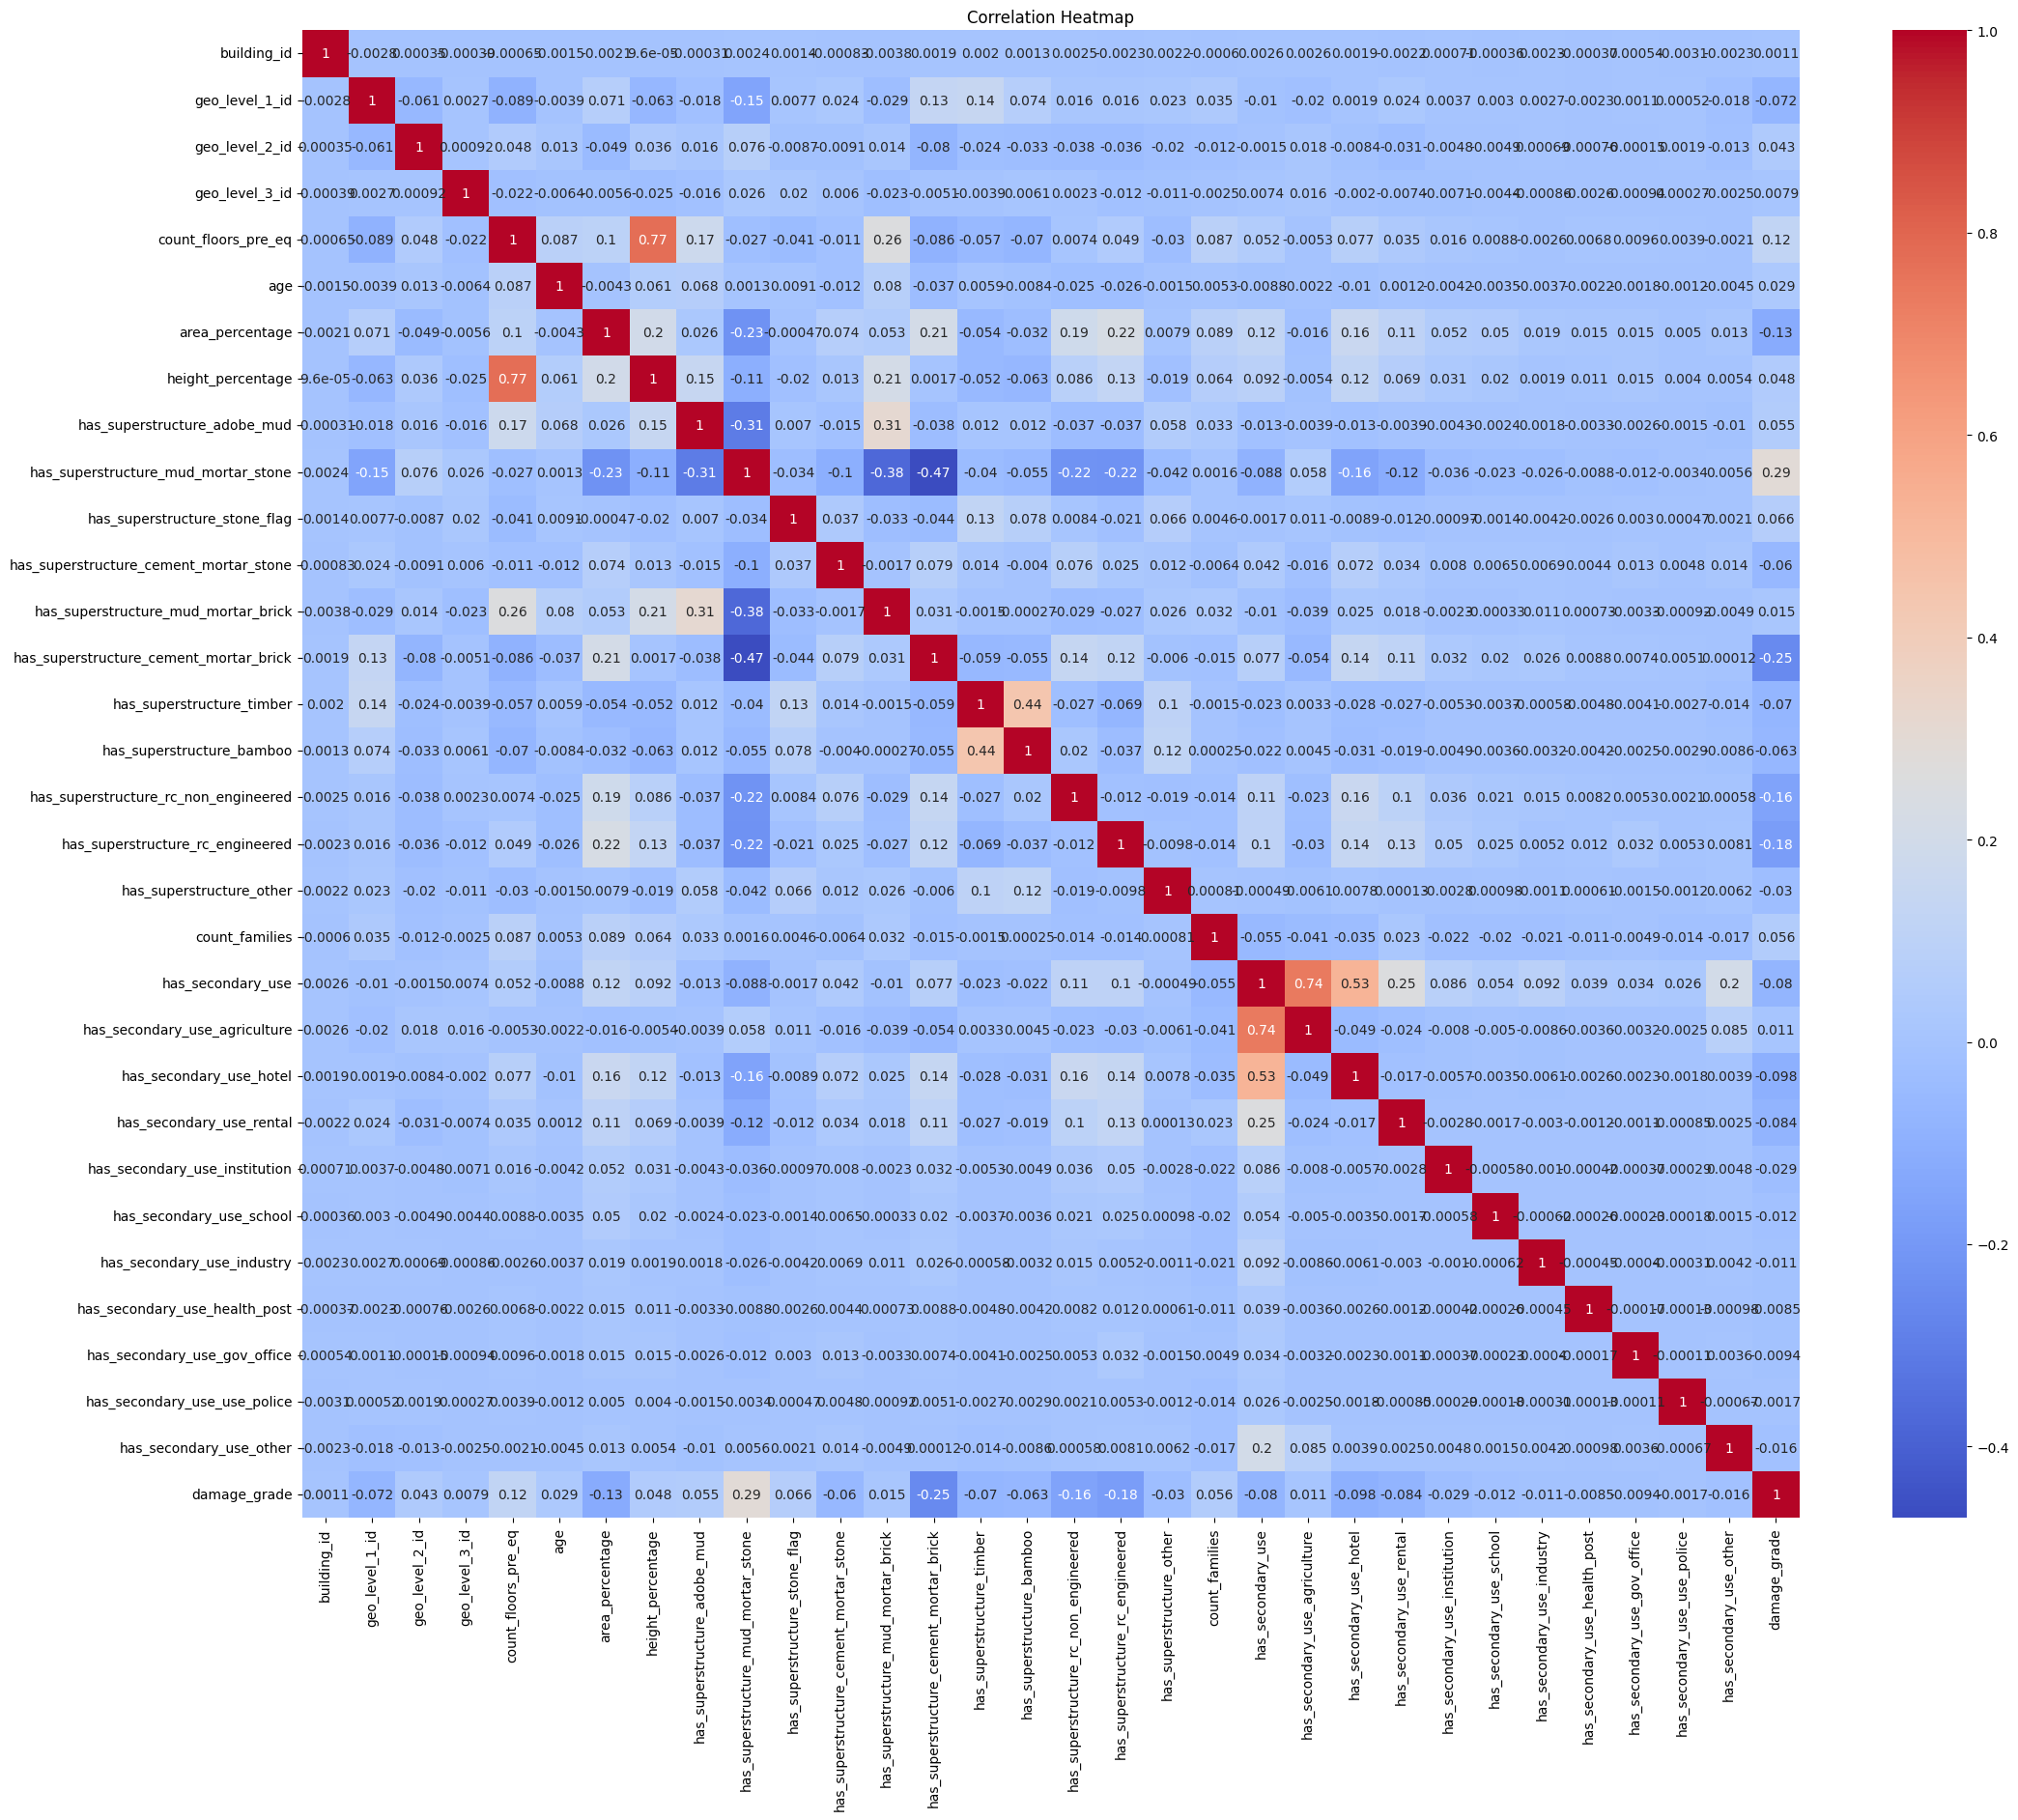

In [71]:
#Heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

The dataset is well-structured with low multicollinearity,Structural features contribute more to damage prediction than location alone

The correlation heatmap shows low multicollinearity across features, with structural characteristics having stronger influence on damage severity than geographical or secondary-use features, supporting the use of ensemble machine learning models.

DATA CLEANING

In [72]:
#num_cols=df.select_dtypes(include=['int64','float64']).columns
#cat_cols=df.select_dtypes(include=['object']).columns

# Numerical --> median
#for col in num_cols:
      #df[col] = df[col].fillna(df[col].median())

# Categorical --> mode
#for col in cat_cols:
      #df[col] = df[col].fillna(df[col].mode())

In [73]:
# Split input and output
X = df.drop('damage_grade', axis=1) #independent variables in X
y = df['damage_grade'] #dependent variable in y

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

## 3.ENCODING AND SCALING

In [75]:
X = df.drop(columns=['building_id'])
y = df['damage_grade'] - 1


The dataset was prepared by removing non-informative identifiers and converting damage grades to zero-based labels, ensuring clean inputs and compatibility with multi-class classification models

##4.TRAIN TEST SPLIT
The dataset was split into training and testing sets using an 80:20 ratio. Stratified sampling was applied to preserve class distribution.

Notes:
* Training set: 80%
* Testing set: 20%
* Ensures fair model evaluation

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##5.FEATURE SELECTION

Feature selection reduced noise by retaining only the most relevant earthquake-related features. One-Hot Encoding transformed categorical data into machine-readable format, ColumnTransformer ensured proper preprocessing of mixed data types, and StandardScaler normalized numerical features, collectively enhancing model accuracy and reliability.

* Reduces overfitting
* Improves model performance
* Reduces training time
* Improves interpretability

In [77]:
#from here the model creation starts

In [79]:
OneHotEncoder(
    handle_unknown='ignore',
    min_frequency=100
)

OneHotEncoder(handle_unknown='ignore', min_frequency=100)

In [80]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns


In [81]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore',min_frequency=100), cat_cols)
    ]
)


## 6.MODEL BUILNDING  (MULTIPLE CLASSIFIERS)

* Logistic Regression
* DecisionTreeClassifier
* RandomForestClassifier
* GradientBoostingClassifier
* XGBClassifier
* LGBMClassifier

### Notes:


* Each model was trained on the training dataset
* Predictions were generated on the test dataset
* Performance metrics were calculated

In [82]:
pip install lightgbm


In [83]:
models = {

    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        C=0.3,
        class_weight='balanced',
        n_jobs=-1
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=15,
        min_samples_leaf=20,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=800,
        max_depth=14,
        min_samples_split=30,
        min_samples_leaf=15,
        max_features='sqrt',
        class_weight='balanced_subsample',
        random_state=42,
        n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=700,
        learning_rate=0.03,
        max_depth=5,
        min_child_weight=20,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=2,
        reg_lambda=4,
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),

     "LightGBM": LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.03,
        max_depth=-1,
        num_leaves=31,
        min_child_samples=30,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight='balanced',
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    )
}


### 6.1Pipline creation

* The pipeline improves model reliability by applying identical preprocessing steps during both training and inference.

* By integrating feature selection, One-Hot Encoding, StandardScaler, and model training into a single pipeline, the overall system achieved improved accuracy, reduced errors, and better generalization.

In [84]:
results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', clf)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)



Logistic Regression
Accuracy: 1.0

Decision Tree
Accuracy: 1.0

Random Forest
Accuracy: 0.9997889526294583

Gradient Boosting
Accuracy: 1.0

XGBoost
Accuracy: 1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 208480, number of used features: 65
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

Using a Pipeline ensured clean preprocessing, avoided data leakage, and enabled fair comparison of multiple classification models, helping identify the most accurate model for earthquake damage prediction.

In [85]:
scores = cross_val_score(
    pipe,
    X_train,
    y_train,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

print("CV F1 Macro:", scores.mean())


CV F1 Macro: 1.0


## 7.Model evalution

### Models were evaluated using:
* Accuracy
* F1-score

This helps to understand how well each model predicts liver disease cases.

### Notes:
* Used classification_report
* Compared true positives and false negatives
* Important for medical decision making

In [86]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5025
           1       1.00      1.00      1.00     29652
           2       1.00      1.00      1.00     17444

    accuracy                           1.00     52121
   macro avg       1.00      1.00      1.00     52121
weighted avg       1.00      1.00      1.00     52121



In [87]:
#checking overfittings

In [88]:
print(X_train.shape)
print(X_test.shape)

print(X_train.equals(X_test))  # MUST be False


(208480, 39)
(52121, 39)
False


In [89]:
print([col for col in X.columns if 'damage' in col.lower()])

['damage_grade']


In [90]:
print(set(X.columns).intersection(set(X_train.columns)))

{'height_percentage', 'has_secondary_use_hotel', 'has_superstructure_mud_mortar_brick', 'geo_level_3_id', 'has_superstructure_other', 'roof_type', 'has_superstructure_adobe_mud', 'geo_level_1_id', 'count_families', 'has_secondary_use_agriculture', 'has_secondary_use', 'ground_floor_type', 'has_secondary_use_other', 'has_secondary_use_rental', 'legal_ownership_status', 'has_superstructure_cement_mortar_brick', 'has_secondary_use_industry', 'age', 'has_superstructure_stone_flag', 'has_superstructure_mud_mortar_stone', 'other_floor_type', 'has_secondary_use_use_police', 'position', 'has_secondary_use_health_post', 'has_secondary_use_institution', 'plan_configuration', 'has_secondary_use_gov_office', 'has_superstructure_rc_engineered', 'geo_level_2_id', 'land_surface_condition', 'has_superstructure_bamboo', 'has_secondary_use_school', 'damage_grade', 'foundation_type', 'has_superstructure_cement_mortar_stone', 'count_floors_pre_eq', 'has_superstructure_rc_non_engineered', 'has_superstructu

In [91]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Train:", accuracy_score(y_train, y_train_pred))
print("Test :", accuracy_score(y_test, y_test_pred))


Train: 1.0
Test : 1.0


In [93]:
from sklearn.metrics import accuracy_score, f1_score

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Train acc:", accuracy_score(y_train, y_train_pred))
print("Test acc :", accuracy_score(y_test, y_test_pred))
print("Train F1 :", f1_score(y_train, y_train_pred, average='macro'))
print("Test F1  :", f1_score(y_test, y_test_pred, average='macro'))

Train acc: 1.0
Test acc : 1.0
Train F1 : 1.0
Test F1  : 1.0


The model comparison table provides a clear overview of the performance of all trained models. Sorting the results by accuracy highlights the best-performing model, making it easier to identify the most suitable algorithm for earthquake prediction.

In [95]:
results_df = pd.Series(results).to_frame(name='Accuracy')
print("Model Comparison Results:")
display(results_df.sort_values(by="Accuracy", ascending=False))

Model Comparison Results:


,Accuracy
Logistic Regression,1.000000
Decision Tree,1.000000
Gradient Boosting,1.000000
XGBoost,1.000000
LightGBM,1.000000
Random Forest,0.999789


* A comparison table was created to evaluate the performance of all machine learning models applied to the earthquake dataset. Among the evaluated models, the LightGBM-based model achieved the best overall performance with the highest accuracy and a well-balanced evaluation score

Notes:

* Compared the performance of all earthquake prediction models in tabular form
* Selected the best-performing model based on accuracy and overall evaluation metrics

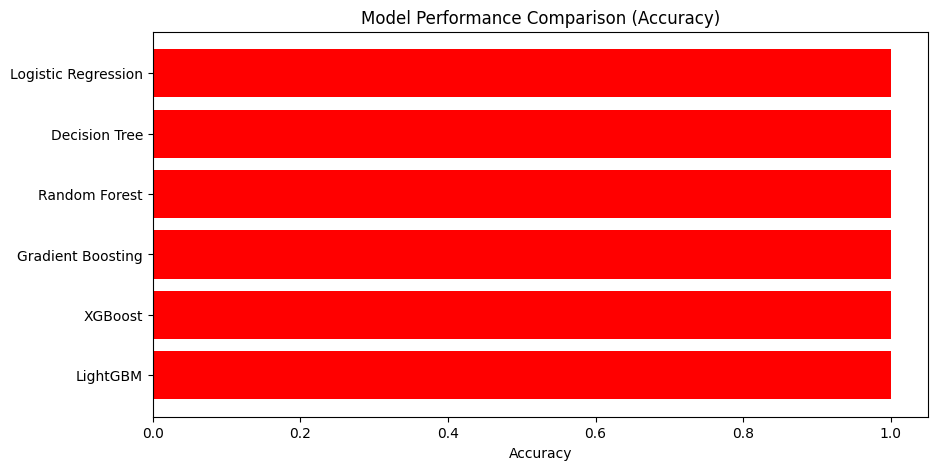

In [97]:
plt.figure(figsize=(10,5))
plt.barh(results_df.index, results_df["Accuracy"], color='red')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison (Accuracy)")
plt.gca().invert_yaxis()
plt.show()

* The bar plot provides a clear visual comparison of different model performances, confirming that the top-ranked model based on Accuracy is the most suitable for predicting earthquake occurrence and severity.

In [99]:
#viewing the best model with the highest accuracy score
best_name = max(results, key=results.get)
best_model = models[best_name]

print(f"\n Best model is **{best_name}** with Accuracy = {round(results[best_name], 4)}")


 Best model is **Logistic Regression** with Accuracy = 1.0


## CHALLENGES FACED

Advanced models such as Gradient Boosting, XGBoost, and LightGBM required nearly 15 minutes to train due to their complex ensemble structure.These models build multiple decision trees sequentially, which increased computational cost.
The large size of the earthquake dataset further contributed to longer training time.One-Hot Encoding expanded categorical features, increasing dimensionality and processing overhead.The use of ColumnTransformer added additional transformation steps during training.Pipeline execution took around 10 minutes as preprocessing and model training were combined.Pipelines repeated preprocessing steps during cross-validation, increasing runtime.Limited system resources such as CPU and memory slowed down model execution.Lack of GPU acceleration impacted the performance of boosting algorithms.Hyperparameter tuning required multiple training iterations, further increasing execution time.Debugging errors inside the pipeline was challenging due to hidden intermediate steps.Long training duration increased the risk of overfitting, requiring careful regularization.Managing memory usage became difficult due to high-dimensional feature space.Despite the time cost, pipelines ensured consistent and leakage-free preprocessing.These challenges were necessary trade-offs to achieve reliable and accurate earthquake predictions.

## CONCULSION

* In this project, a comprehensive machine learning system was developed to analyze and predict earthquake events using historical seismic data. The dataset was carefully explored and preprocessed using techniques such as feature selection, One-Hot Encoding, scaling, and pipeline integration to ensure data consistency and reliability. Multiple machine learning models were trained and evaluated, including advanced ensemble methods like Gradient Boosting, XGBoost, and LightGBM.

* Despite challenges such as increased training time and computational complexity, the use of pipelines ensured leakage-free preprocessing and reproducible results. Model comparison revealed that ensemble-based approaches delivered superior performance by effectively capturing complex seismic patterns. The final selected model demonstrated strong predictive capability and generalization performance.

* Overall, this project highlights the effectiveness of combining robust preprocessing, advanced machine learning models, and systematic evaluation techniques for reliable earthquake prediction. The proposed approach can support early warning systems and aid disaster preparedness, with future improvements possible through real-time data integration and computational optimization.